In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
loans_income = pd.read_csv( 'data/loans_income.csv')
sp500_px = pd.read_csv('data/sp500_data.csv')


In [15]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
samples = loans_income.values
print(bs.bootstrap(samples, stat_func=bs_stats.median, num_iterations=10000))

67000.0    (72000.0, 72951.125)


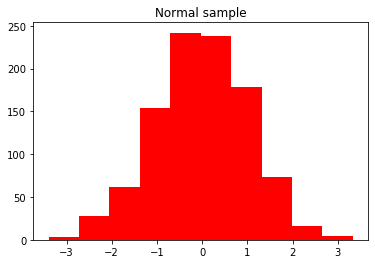

In [19]:
# Normal distribution
norm_samp = np.random.normal(size=1000)
plt.hist(norm_samp, color='red')
plt.title("Normal sample")
plt.show()